In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, date 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [3]:
df = pd.read_excel(r"C:\Users\DELL\Downloads\data.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.dtypes # check the dtypes of columns
df.dtypes.value_counts()
df.columns
df.describe()

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


int64             18
object            10
float64            9
datetime64[ns]     2
Name: count, dtype: int64

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


## Data Cleaning

In [8]:
#dropping unwanted columns
df.drop('Unnamed: 0',axis = 1,inplace =True)
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [9]:
df.drop(['DOJ','DOL','CollegeCityID','CollegeTier',
        'Domain','ComputerProgramming','ElectricalEngg','TelecomEngg',
        'CivilEngg'],axis = 1,inplace = True)
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [10]:
df.isnull().sum()

ID                       0
Salary                   0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

In [13]:
df['10board'].value_counts()

10board
cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: count, Length: 275, dtype: int64

In [14]:
df['Salary'].value_counts()

Salary
300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: count, Length: 177, dtype: int64

In [15]:
df['Salary'].unique()

array([ 420000,  500000,  325000, 1100000,  200000,  300000,  400000,
        600000,  230000,  450000,  270000,  350000,  250000,  120000,
        320000,  190000,  180000,  335000,  435000,  345000,  145000,
        220000,  530000,  340000,  360000,  215000,   80000,  330000,
        380000,  110000,  205000,   95000,  390000,   60000,  240000,
        525000,  305000,  150000,  310000,  455000,  800000,  100000,
        280000,  445000,  315000,  370000,  275000, 1500000,  425000,
        470000,  460000,  510000,  480000,  170000,  640000,  225000,
        440000, 1200000,  675000,  105000,  195000,  385000,  235000,
        615000,  290000,  140000,  405000, 1860000,  375000,  430000,
        660000,   70000,  410000,  550000,   35000,  115000,  415000,
        265000,  285000,  245000,  395000,  560000,  700000,  185000,
        160000,  625000,   85000,  135000,  785000,  210000,  155000,
        355000,  535000,  690000,  260000, 1110000, 1000000,  505000,
        475000,  715

In [16]:
#Identifying Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n",missing_values, sep = '')

Missing Values:
ID                       0
Salary                   0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64


In [17]:
#Handling Outliers
#Identifying and handle outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include = np.number)))
df_no_outliers = df[(z_scores < 3).all(axis=1)]
z_scores

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.268535,0.527947,0.647233,0.657765,1.939676,0.836346,0.797646,0.655278,0.034716,0.127240,0.961148,0.095037,0.608820,0.523491,0.244363,0.983466,0.707581,0.550939,1.512658,0.304966
1,0.230991,0.904045,0.758921,0.657765,0.957729,0.135401,0.174641,0.655278,0.003322,1.842720,1.249258,2.180295,2.342739,0.523491,0.244363,0.676367,0.246801,1.300083,0.060978,0.993910
2,0.404233,0.081332,0.718307,1.156686,0.569744,1.060644,0.181988,0.655278,0.059466,1.080285,0.500173,1.172473,0.608820,0.523491,0.244363,0.301041,1.661318,0.169167,0.693995,0.803821
3,1.091347,3.724775,0.779227,0.657765,0.830439,0.367196,0.386200,1.526071,0.034716,1.270894,0.961148,0.912785,0.608820,0.523491,0.244363,0.081894,0.210589,0.364495,0.237001,0.775129
4,0.881871,0.506320,0.007570,0.052948,0.212176,1.293542,0.295584,0.655278,0.003322,0.413154,1.422124,0.395612,0.870120,0.523491,0.244363,0.819775,0.452174,1.127304,0.258734,0.008542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1.695828,0.130223,2.623172,1.262582,1.724441,0.231409,1.222849,0.655278,0.066109,1.302326,1.931475,0.313837,0.608820,0.523491,0.244363,0.068416,0.210589,0.245794,0.812774,0.775129
3994,0.245025,0.976442,1.225977,0.551869,1.685097,0.057033,0.711928,1.526071,0.028072,0.825804,1.055621,0.176812,2.052008,0.523491,0.244363,0.257520,0.777245,0.976964,0.941813,0.043465
3995,0.847824,0.057826,0.399491,0.052948,0.815231,0.964072,0.181988,0.655278,0.003322,0.253978,0.306535,0.395612,0.608820,0.523491,0.244363,1.495978,1.777487,1.584968,1.140864,0.618474
3996,0.780115,0.506320,0.080674,1.156686,0.416997,0.870085,0.130557,1.526071,0.059466,0.492239,1.055621,1.581347,0.608820,1.981485,0.244363,0.117807,0.106828,0.477071,0.190746,0.043465


In [18]:
# Handling missing values
df = df.dropna()
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [19]:
# handling duplicated data
df = df.drop_duplicates()
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [20]:
#Address Inconsistent or Erroneous Data
#Manually correct errors or inconsistencies
df['12graduation'].replace({'erroneous_value':'correct_value'},inplace=True)
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   Designation            3998 non-null   object        
 3   JobCity                3998 non-null   object        
 4   Gender                 3998 non-null   object        
 5   DOB                    3998 non-null   datetime64[ns]
 6   10percentage           3998 non-null   float64       
 7   10board                3998 non-null   object        
 8   12graduation           3998 non-null   int64         
 9   12percentage           3998 non-null   float64       
 10  12board                3998 non-null   object        
 11  CollegeID              3998 non-null   int64         
 12  Degree                 3998 non-null   object        
 13  Spe

# Univariate Analysis of Numerical and Categorical Columns

### Probability Density Function(PDF) Plot

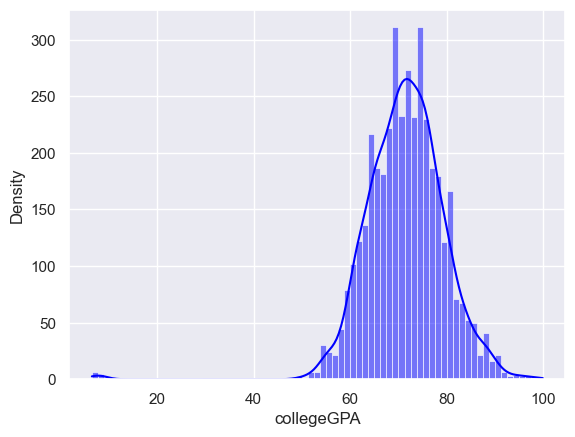

In [24]:
sns.histplot(df['collegeGPA'],kde =True,color ='blue')
plt.xlabel('collegeGPA')
plt.ylabel('Density')
plt.show();

### Observations:
- this probability density function(PDF) describes the density of collegeGPA of all employees Most of the employees are between 65 to 75.

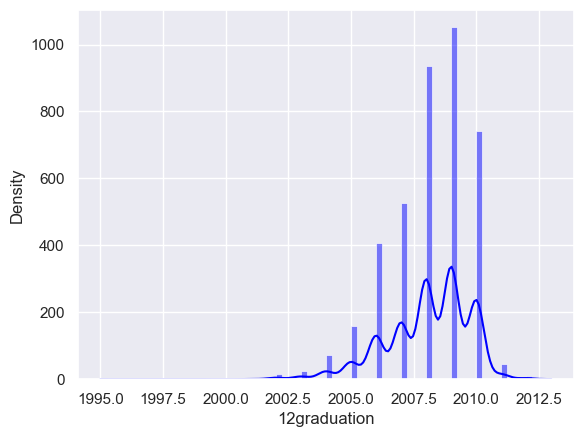

In [26]:
sns.histplot(df['12graduation'],kde =True,color ='blue')
plt.xlabel('12graduation')
plt.ylabel('Density')
plt.show();

### Observations:
- This probability density function(pdf) describes the density of 12 graduation of all employees.
- most of the employees are passed out in the year of 2009.

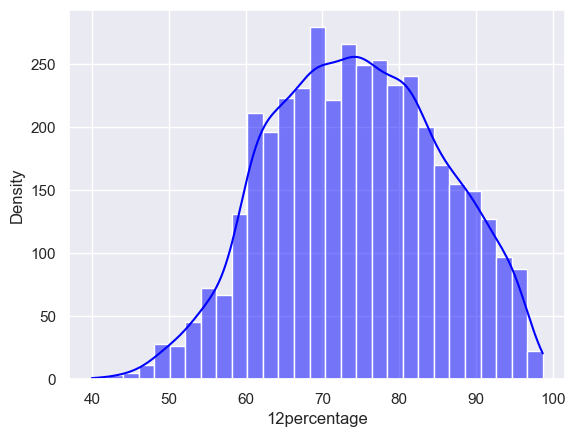

In [28]:
sns.histplot(df['12percentage'],kde=True,color ='blue')
plt.xlabel('12percentage')
plt.ylabel('Density')
plt.show();

### Observations:
- This Probability density function describes the density of 12 percentage of all employees and most of the employees are passed in between 70 to 73 percentage.

## Histogram

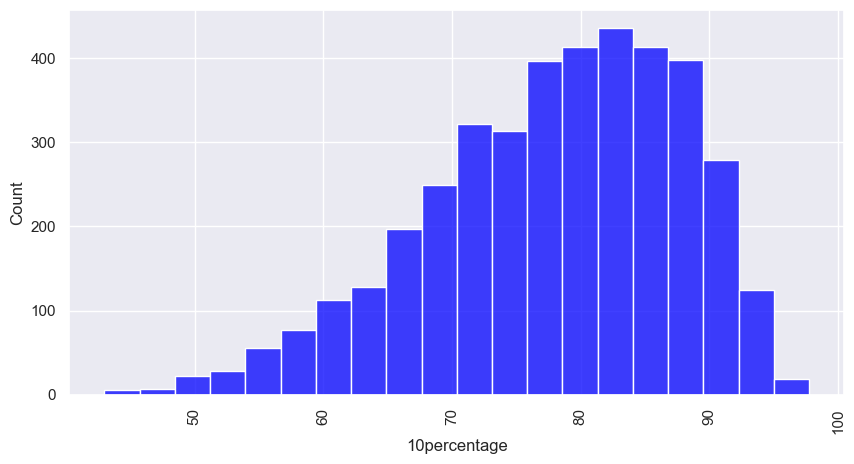

In [31]:
fig, ax =plt.subplots(figsize=(10,5))
plt.xticks(rotation = 90)
sns.histplot(data=df,x ='10percentage',color='blue',bins=20,ax=ax)
plt.show();

### Observations:
- This histogram plot describes the density of 10percentage of all employees and the most of the employees are passed in approximately 83percentage

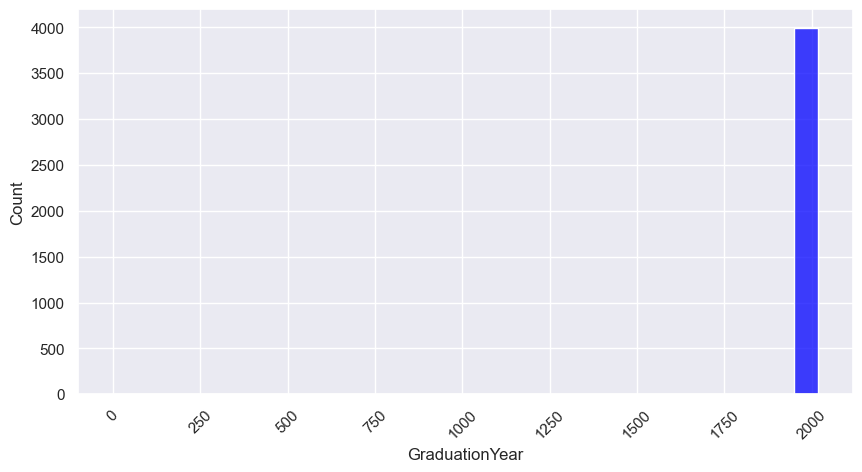

In [33]:
fig,ax=plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
sns.histplot(data=df,x='GraduationYear',color='blue',bins=30,ax=ax)
plt.show();

### Observations:
- Here the histogram describes the graduation year of employees.so, the most of the employees are completed their graduation in the year of 2000.

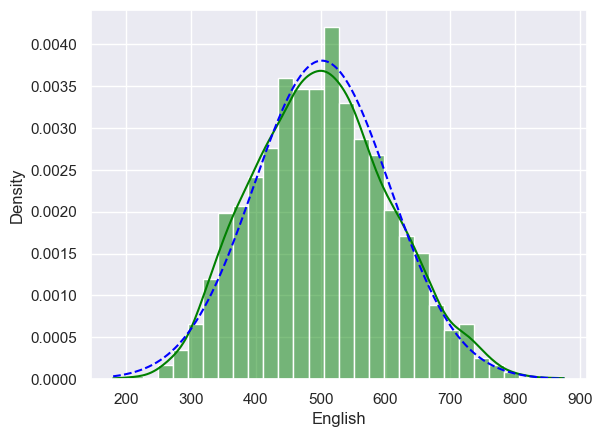

In [35]:
import scipy.stats as stats

sns.histplot(data=df['English'],stat = 'density',bins = 30,kde =True, color = 'green')
x = np.linspace(df['English'].min(),df['English'].max(),1000)
plt.plot(x,stats.norm.pdf(x,df['English'].mean(),df['English'].std()),color="blue",linestyle='dashed')
plt.show();

### Observations:
- Here the plot describes the density of english.most of the employees has given preference to english from 440 to 520

## Box Plot

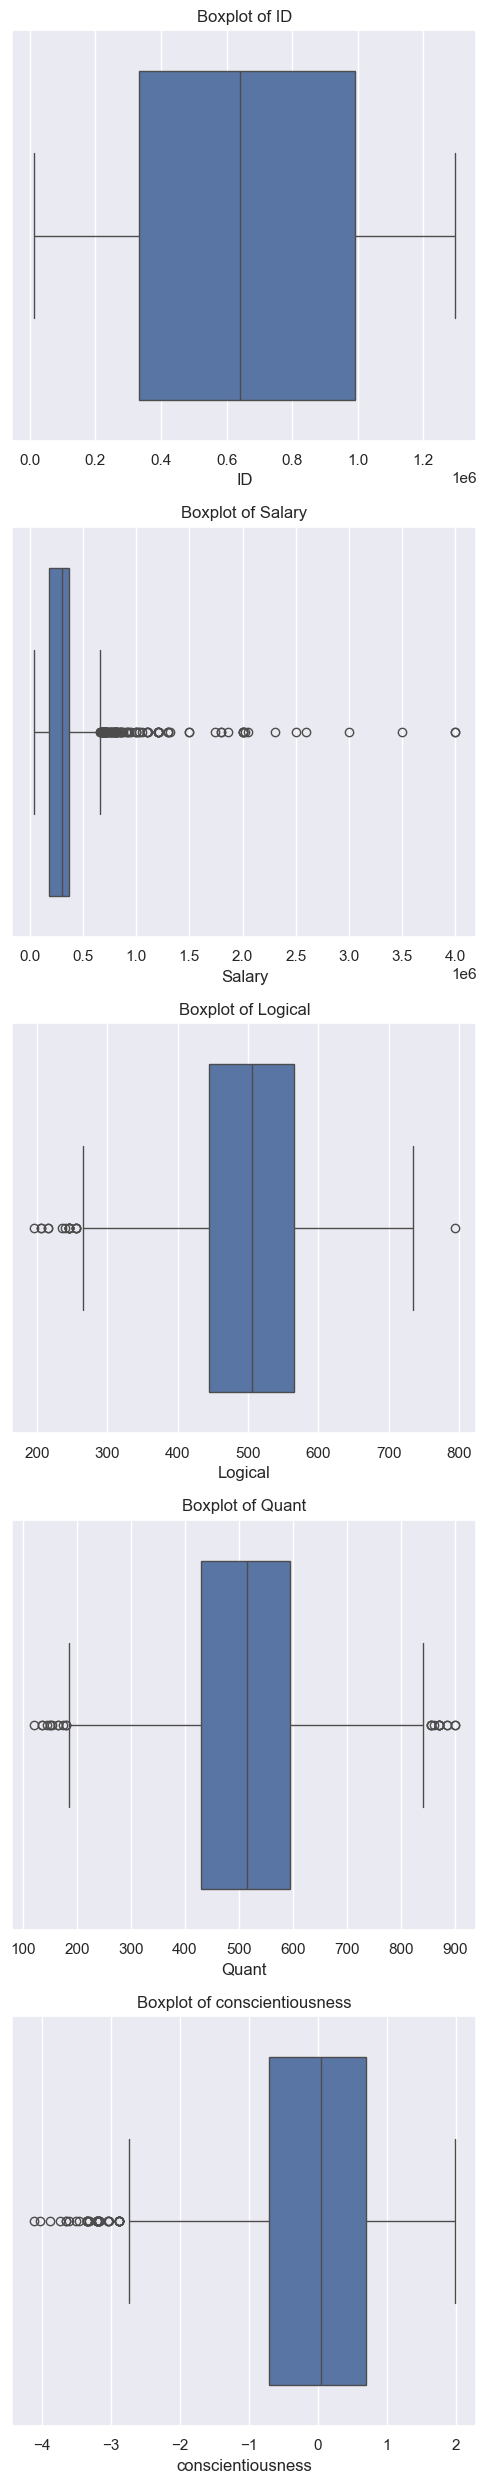

In [38]:
selected_columns =['ID','Salary','Logical','Quant','conscientiousness']
fig, axes = plt.subplots(nrows=len(selected_columns),ncols=1,figsize=(5,5*len(selected_columns)))
for i,column in enumerate(selected_columns):
    ax = axes[i]
    sns.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot of {column}")
plt.tight_layout()
plt.show();

##### Observation of outliers

- Here the plots are describing the outliers of variables.After visualizing the    data using boxplot for the "ID" there are no outlierspresent in distribution
- In the boxplot analysis of the "Salary" it shows the presence of outliers at right-side,the potential extreme values in the upper range of the data.The distribution of data is positively skewed.
- The boxplot analysis of the "Logical" variable reveals an asymmetric distribution with a notable difference in the number of outliers on the left and right sides.The "Logical" variable exhibits a median value of 505, an interquartile range(IQR) of 120, and spread of values within 195 min, 795max.
- The boxplot analysis of the "Quant" reveals a symmetric distribution with outliers present on both the right and left sides.The "Quant" variable exhibits a median valueof 515 an IQR of 165, and a spread of values within 120 min,900 max.
- In the boxplot analysis of the conscientiousness" it shows the presence of left-side outliers,the potential extreme values in the lower range of the data.The distribution of the data is negatively skewed,it has a long left tail, and the outliers are pulling the mean and the left end of the boxplot downward.

In [40]:
column_median = df['Logical'].median()
column_median

505.0

In [41]:
column_median = df['Quant'].median()
column_median

515.0

In [42]:
column_min = df['Logical'].min()
column_min

195

In [43]:
column_max = df['Logical'].max()
column_max

795

In [44]:
column_min = df['Quant'].min()
column_min

120

In [45]:
column_max = df['Quant'].max()
column_max

900

In [46]:
column_data = df['Logical']
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
column_iqr =  Q3 - Q1
print(f"The Interquartile Range (IQR) of 'logical' is: {column_iqr}")

The Interquartile Range (IQR) of 'logical' is: 120.0


In [47]:
column_data = df['Quant']
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
column_iqr =  Q3 - Q1
print(f"The Interquartile Range (IQR) of 'Quant' is: {column_iqr}")

The Interquartile Range (IQR) of 'Quant' is: 165.0


## Countplot

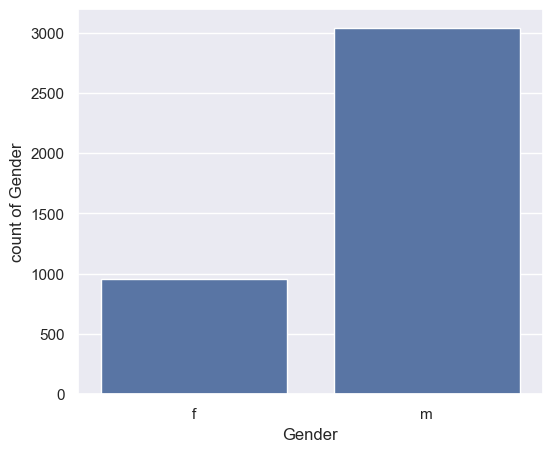

In [49]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender',data=df)
plt.ylabel('count of Gender')
plt.xlabel('Gender')

plt.xticks(rotation = 0)
plt.show();

### Observations:
- The countplot of the "Gender" variable.here the highest number of employees are males and lowest is females.

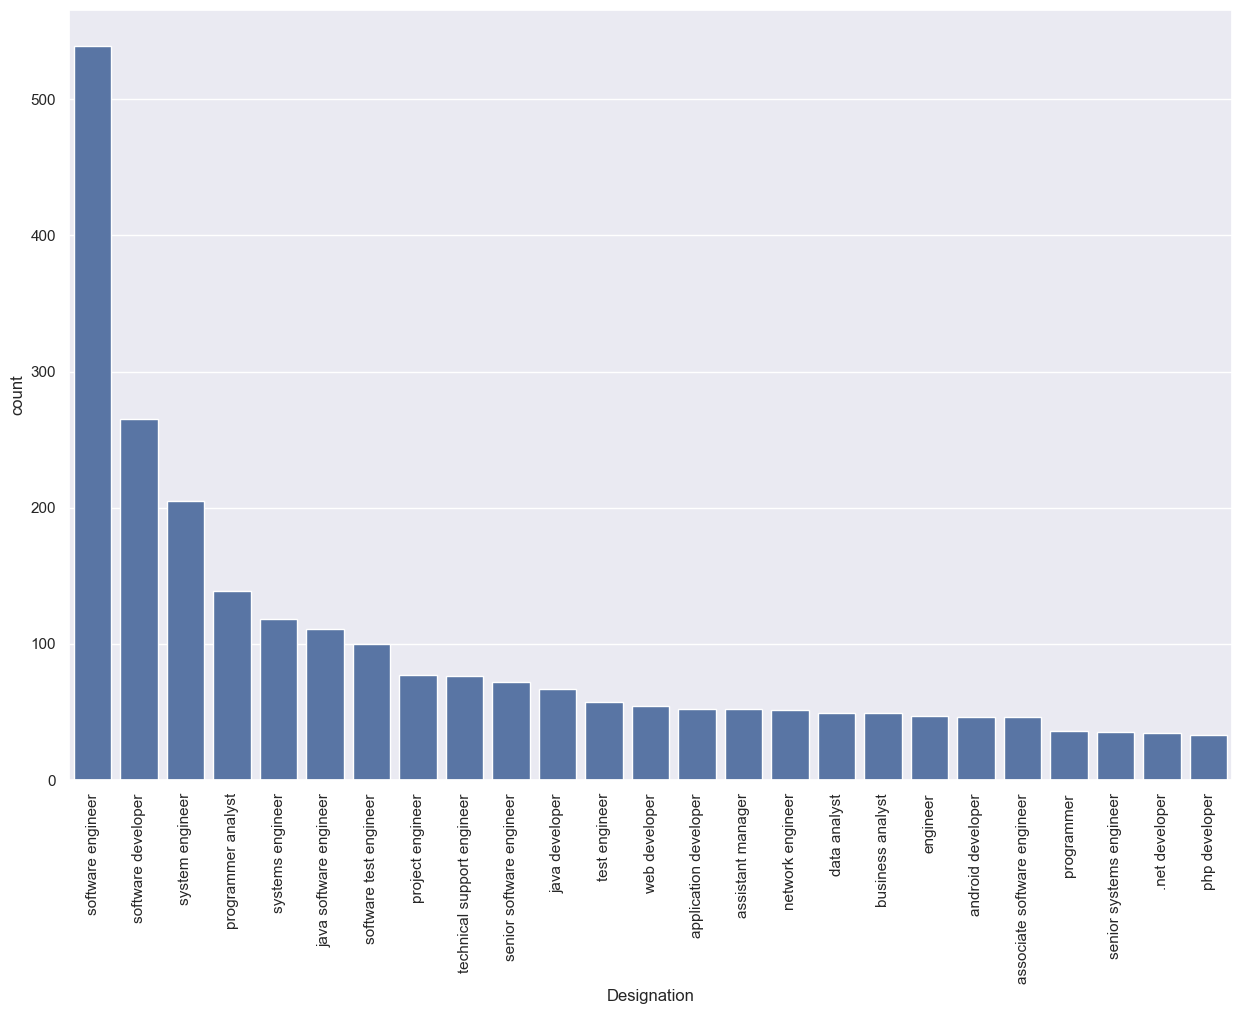

In [51]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Designation',order=df['Designation'].value_counts().index[:25])
plt.show();

### Observations:
- In this plot analysis of "Designation".here most of the employees Designation is software engineer and lowest number of designation is php developer.

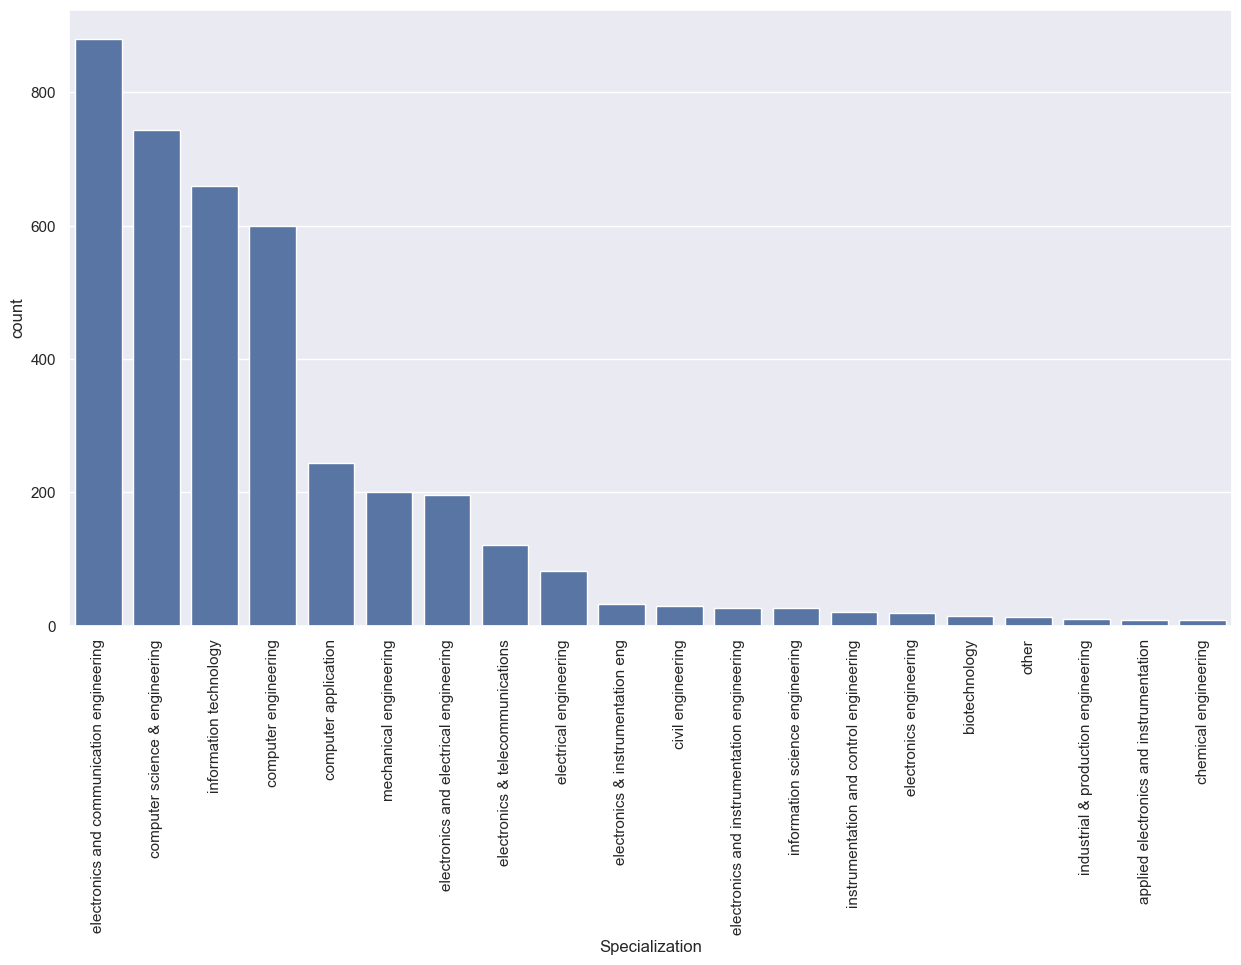

In [53]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Specialization',order=df['Specialization'].value_counts().index[:20])
plt.show();

### Observations:
- In this plot analysis of "Specialization".here most of the employees "Specialization" is electronics and communication engineering and lowest number of employees "Specialization" is chemical engineering.

In [55]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers
outliers_dict = {}
for col in df.select_dtypes(include = np.number).columns:
    outliers_dict[col] = detect_outliers(df[col])

print("Outliers:")
print(outliers_dict)

Outliers:
{'ID': 0       False
1       False
2       False
3       False
4       False
        ...  
3993    False
3994    False
3995    False
3996    False
3997    False
Name: ID, Length: 3998, dtype: bool, 'Salary': 0       False
1       False
2       False
3        True
4       False
        ...  
3993    False
3994    False
3995    False
3996    False
3997    False
Name: Salary, Length: 3998, dtype: bool, '10percentage': 0       False
1       False
2       False
3       False
4       False
        ...  
3993    False
3994    False
3995    False
3996    False
3997    False
Name: 10percentage, Length: 3998, dtype: bool, '12graduation': 0       False
1       False
2       False
3       False
4       False
        ...  
3993    False
3994    False
3995    False
3996    False
3997    False
Name: 12graduation, Length: 3998, dtype: bool, '12percentage': 0       False
1       False
2       False
3       False
4       False
        ...  
3993    False
3994    False
3995    False
3996    Fal

## Bivariate Analysis

### Scatter plot

#### Relationships between numerical columns
###### Analysis of numerical columns

<Axes: xlabel='12graduation', ylabel='Salary'>

Text(0.5, 0, '12graduation')

Text(0, 0.5, 'Salary')

<Axes: xlabel='10percentage', ylabel='Salary'>

Text(0.5, 0, '10percentage')

Text(0, 0.5, 'Salary')

<Axes: xlabel='12percentage', ylabel='Salary'>

Text(0.5, 0, '12percentage')

Text(0, 0.5, 'Salary')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

Text(0.5, 0, 'collegeGPA')

Text(0, 0.5, 'Salary')

<Axes: xlabel='English', ylabel='Salary'>

Text(0.5, 0, 'English')

Text(0, 0.5, 'Salary')

<Axes: xlabel='GraduationYear', ylabel='Salary'>

Text(0.5, 0, 'GraduationYear')

Text(0, 0.5, 'Salary')

<Axes: xlabel='Logical', ylabel='Salary'>

Text(0.5, 0, 'Logical')

Text(0, 0.5, 'Salary')

<Axes: xlabel='Quant', ylabel='Salary'>

Text(0.5, 0, 'Quant')

Text(0, 0.5, 'Salary')

<Axes: xlabel='Salary', ylabel='Salary'>

Text(0.5, 0, 'Salary')

Text(0, 0.5, 'Salary')

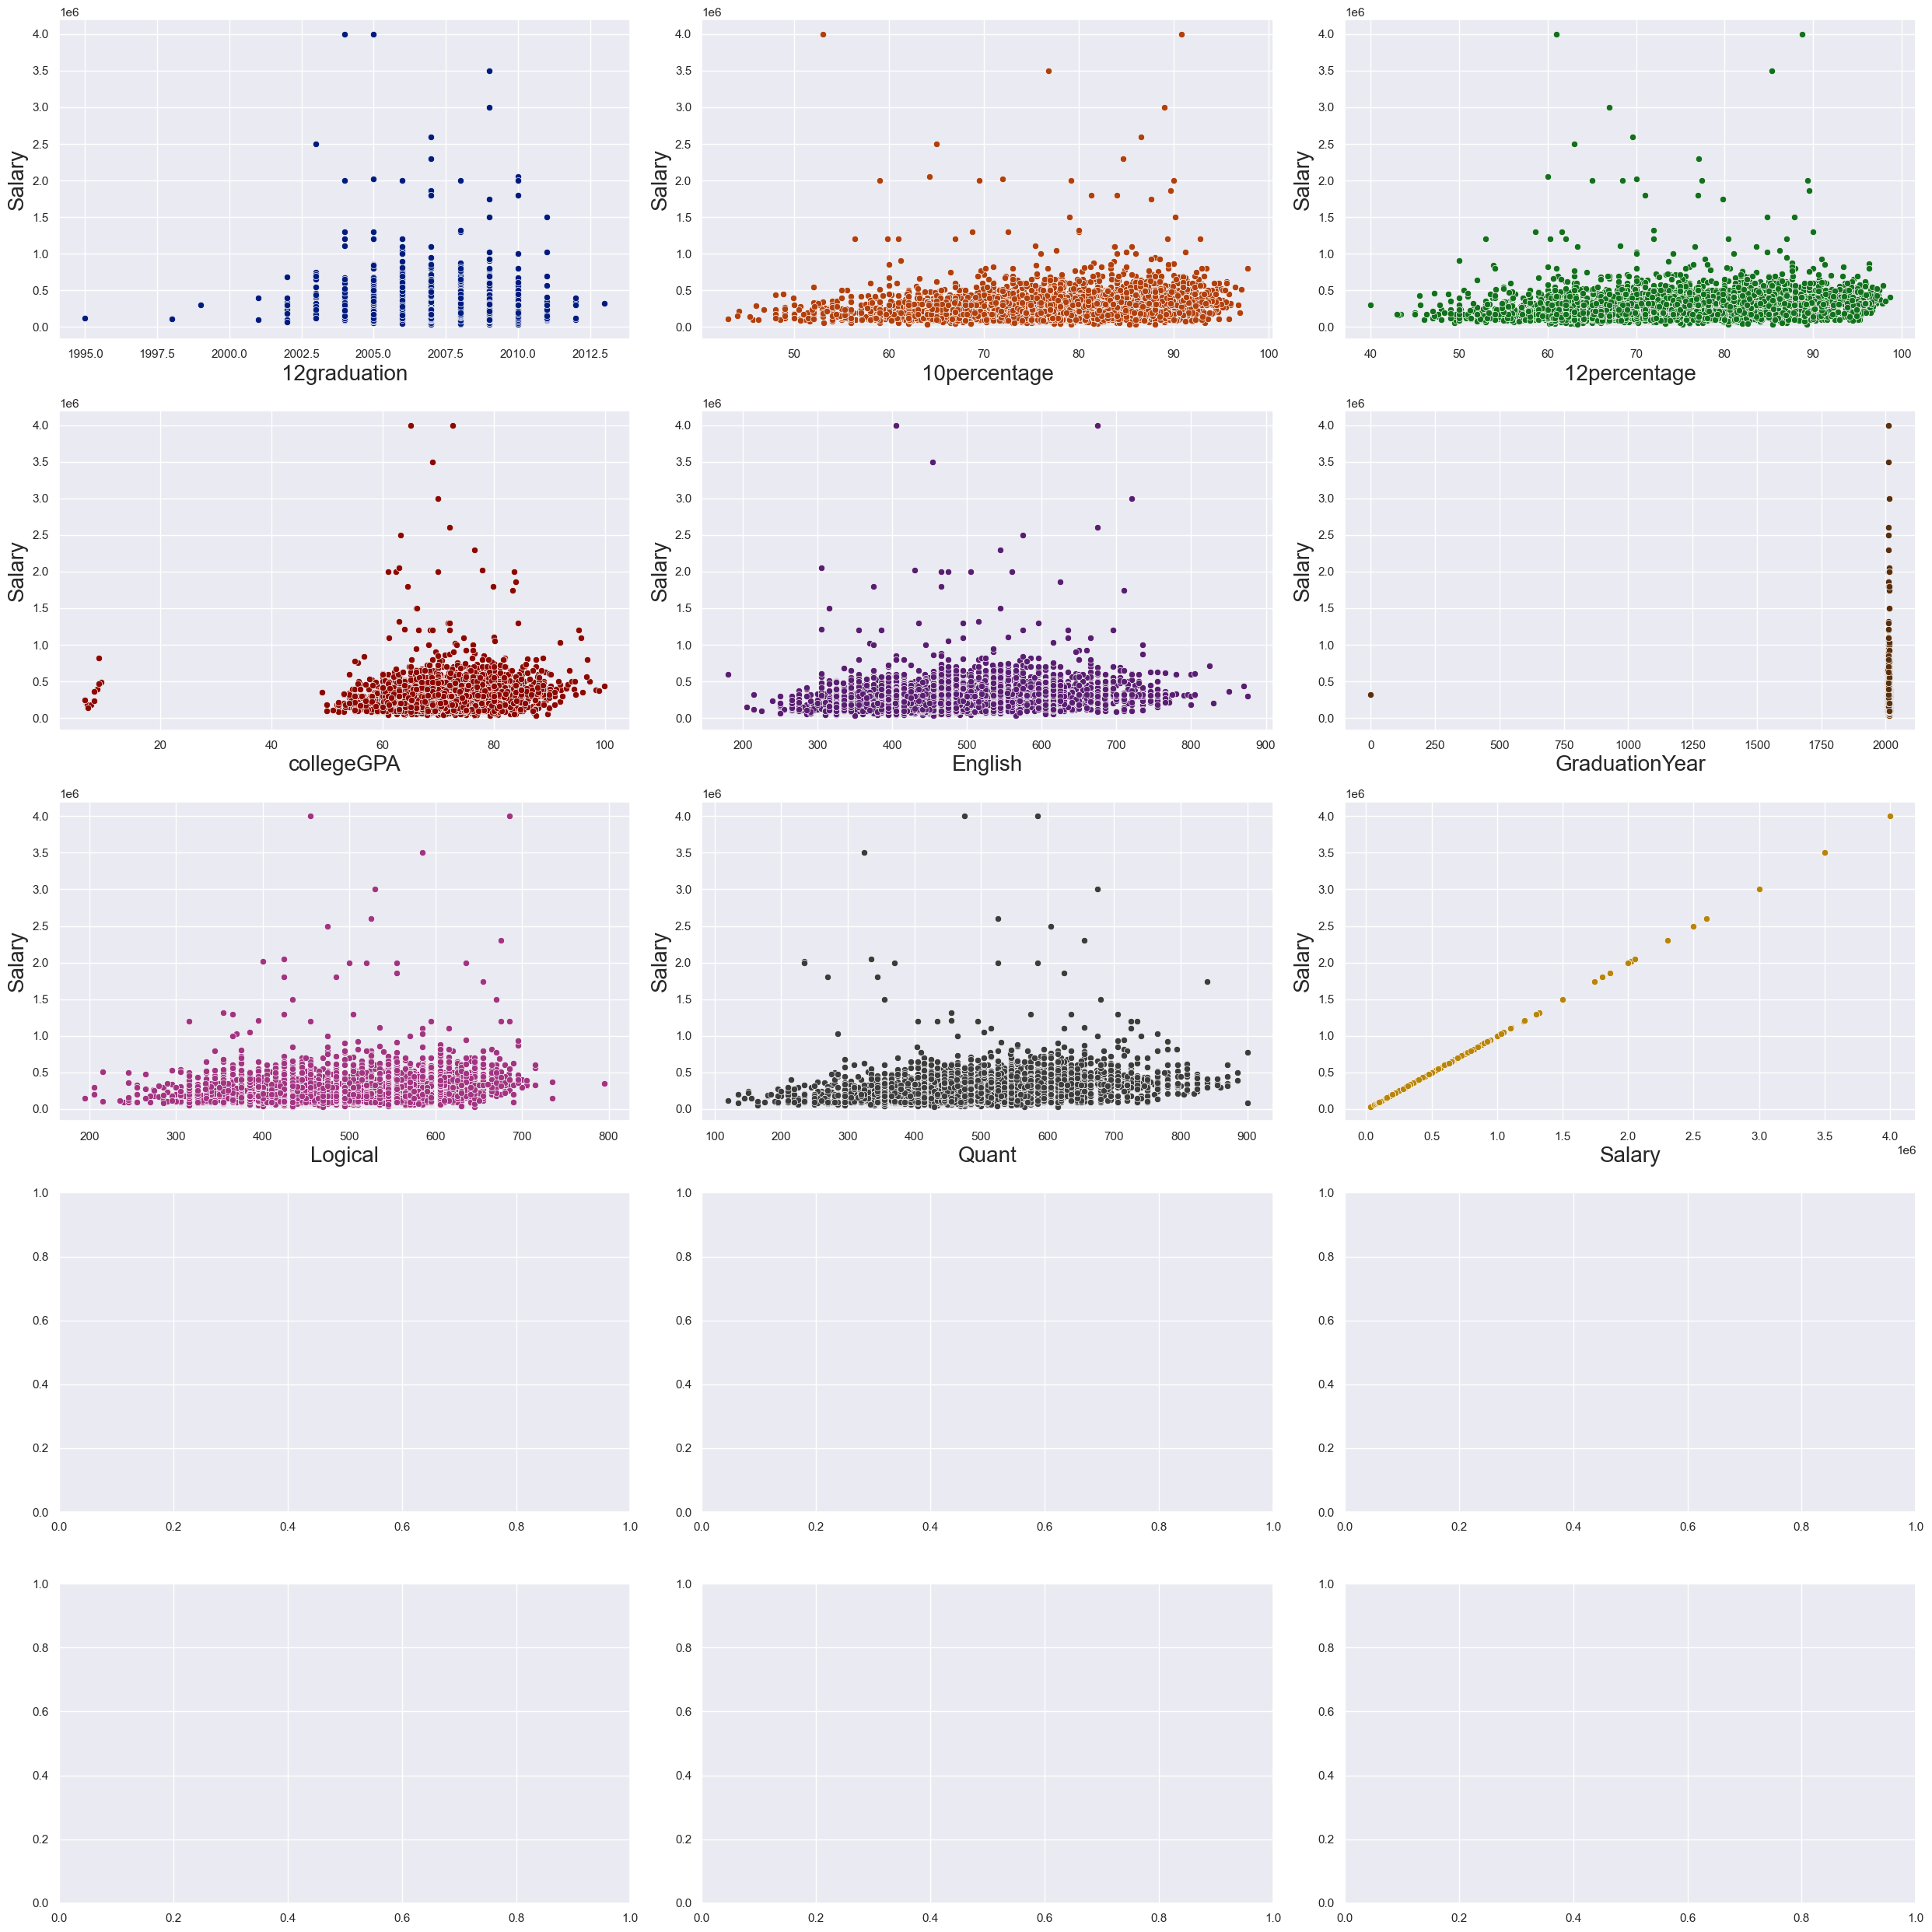

In [59]:
num_cols_3 = ['12graduation','10percentage','12percentage','collegeGPA','English',
             'GraduationYear','Logical','Quant','Salary']
num_rows = len(num_cols_3) // 2 + len(num_cols_3) % 2
num_cols = 3
fig, axes = plt.subplots(num_rows,num_cols,figsize=(25,25))

if num_rows == 1:
    axes = [axes]
colors = sns.color_palette('dark',len(num_cols_3))

for i, col_name in enumerate(num_cols_3):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=col_name,y='Salary',data=df,ax=axes[row][col],color=colors[i])
    axes[row][col].set_xlabel(col_name,fontsize=20)
    axes[row][col].set_ylabel('Salary',fontsize=20)

plt.tight_layout()
plt.show()

### Pair plots of numerical columns

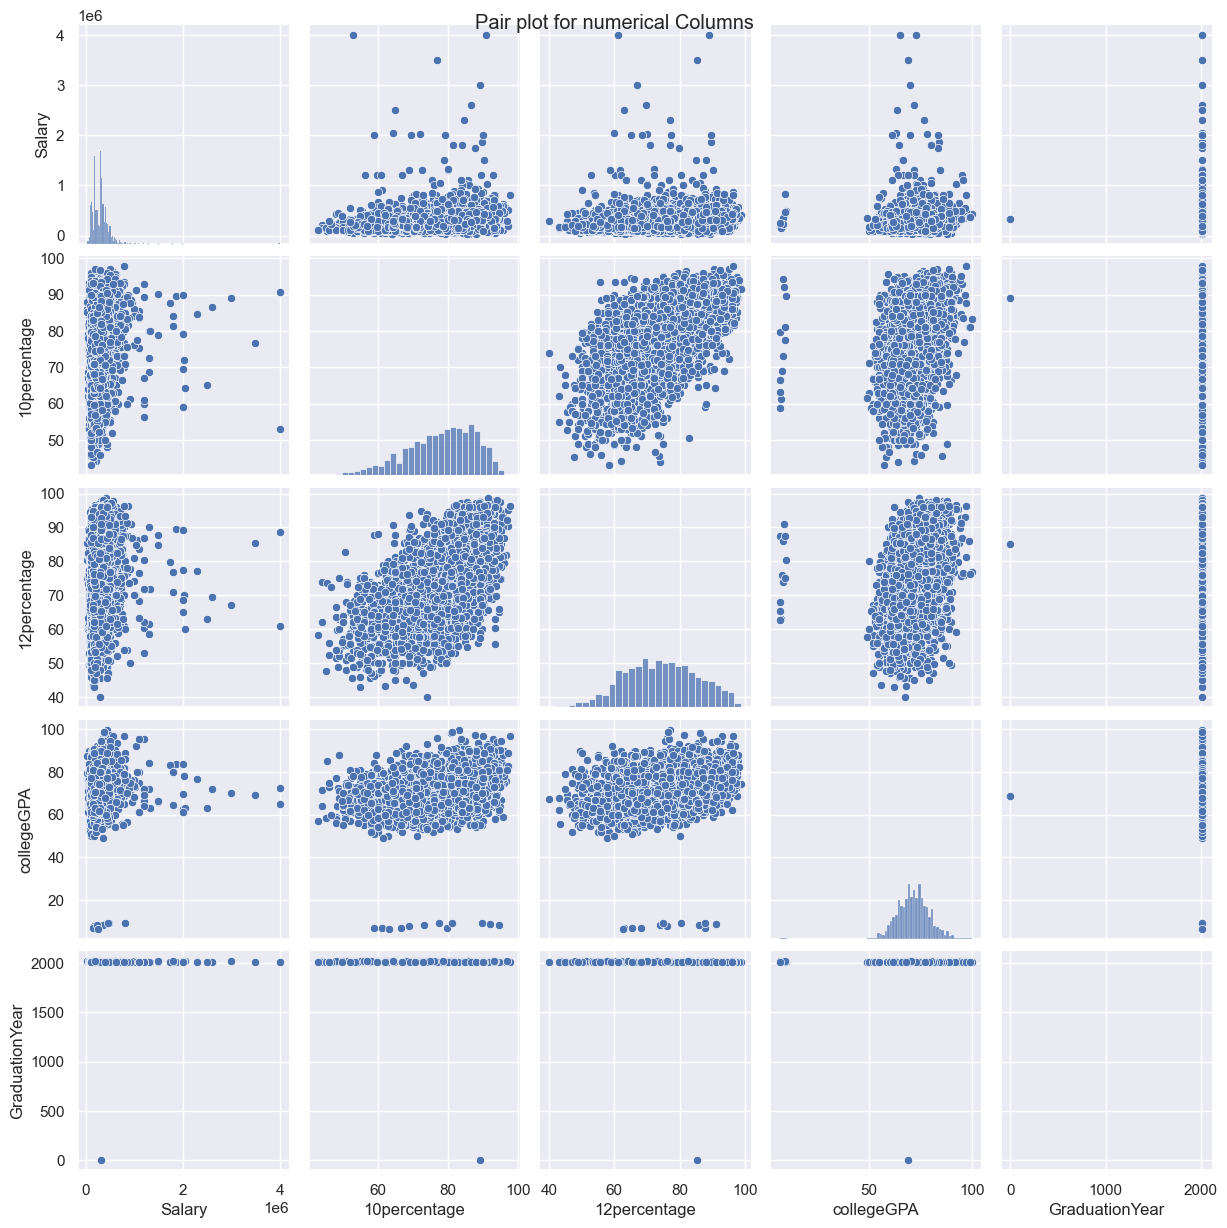

In [61]:
numerical_columns = ['Salary','10percentage','12percentage','collegeGPA','GraduationYear']
sns.pairplot(data=df,vars=numerical_columns)
plt.suptitle('Pair plot for numerical Columns')
plt.show();

### Patterns between categorical and numerical columns

### Violinplot

<Axes: xlabel='Degree', ylabel='Salary'>

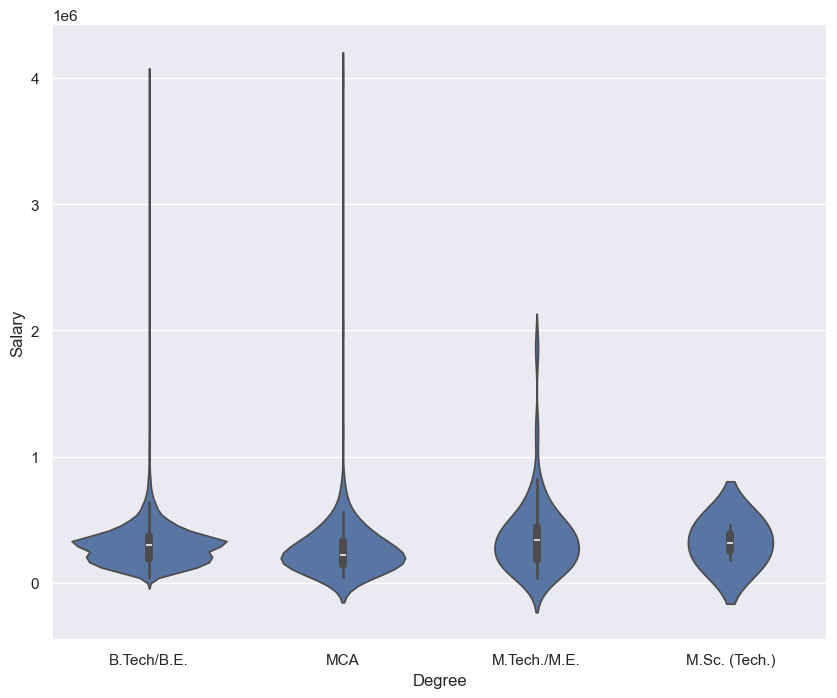

In [67]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data = df, x = 'Degree', y = 'Salary', ax = ax)

### Observations:
- This swarmplot analysis the relationship between Degree and salary.here the B.Tech/B.E beckground employees have highest salaries and M.sc(Tech) employees have lowest salaries.

### Boxplot

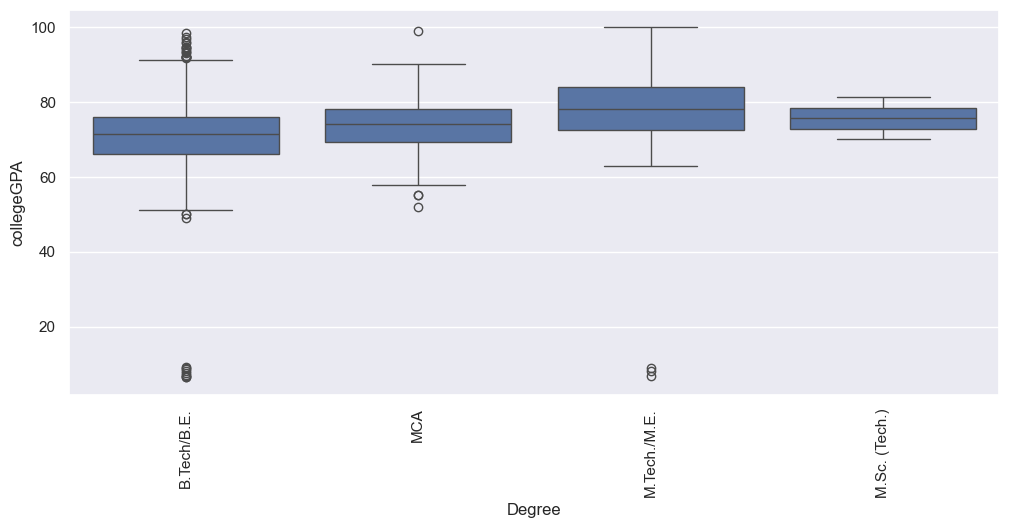

In [71]:
fig = plt.subplots(figsize =(12,5))
sns.boxplot(data=df,x = 'Degree',y='collegeGPA')
plt.xticks(rotation = 90)
plt.show();

### Observations:
- This Box plot analysis the relationship between Degree and collegeGPA variables.Here the B.Tech/B.E Degree have more outliers in upward direction and downward direction comparing with other Degrees.so,the B.Tech/B.E background employees have highest collegeGPA.


## Barplot

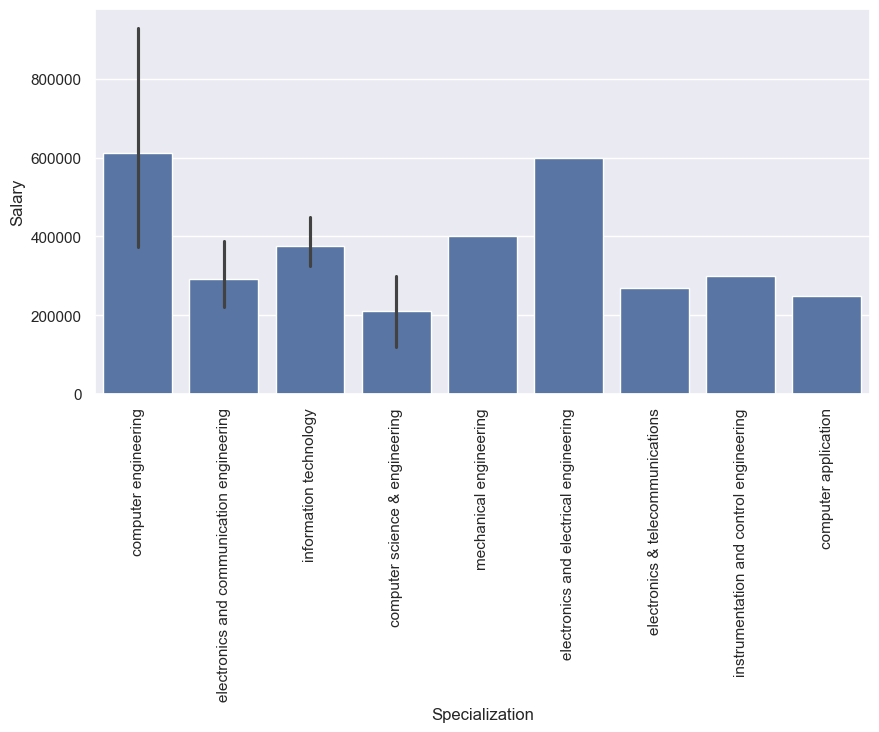

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.head(20), x='Specialization',y='Salary')
plt.xticks(rotation=90)
plt.show();

### Observations:
- This barplot represent an estimate of central tendency between categorical and numerical variable with the height of each rectangle.This is the relationship between Specialization and Salary variables of top 20 values.

### Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [79]:
df

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,Logical,Quant,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,...,585,525,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,...,610,780,466,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,...,545,370,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,...,585,625,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,...,625,465,233,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,...,334,475,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,...,410,535,420,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,...,475,465,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,...,410,320,-1,438,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [81]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [83]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

#### Is there a relationship between gender and specialization?(i.e.Does the preference of specialization depend on the gender?)

In [86]:
cse_data =df[df['Degree'] == 'B.Tech/B.E']
job_roles=['Programming Analyst','Software Engineer','Hardware Engineer','Associate Engineer']
req_data = cse_data[cse_data['Designation'].isin(job_roles)]
salary_range =(250000,300000)
avg_sal=req_data['Salary'].mean()
if salary_range[0]<=avg_sal<=salary_range[1]:
    print('The claim is supported by the Data')
else:
    print('The claim is not supported by the Data')

The claim is not supported by the Data


In [88]:
from scipy import stats
contingency_table=pd.crosstab(df['Gender'],df['Designation'])

In [90]:
chi2_stats,p_val,dof,expected=stats.chi2_contingency(contingency_table)
alpha=0.05
if p_val<=alpha:
    print('There is a significant relationship between gender and specialization preference')
else:
    print('There is no significant relationship between gender and specialization preference')

There is a significant relationship between gender and specialization preference


### Observations:
The data analysis reveals that the proposed salary range of 2.5-3 lakhs for computer science and engineering graduates in certain job roles is not substantiated. Furthermore, statistical test results show no significant correlation between gender and specialization preference among graduates, as indicated by the AMCAT dataset.

### Conclusion:
#### Dataset Overview:

- The dataset includes 4,000 rows and 40 columns, with notable duplication that necessitates initial cleaning. This involves removing unwanted rows and columns, and handling any NaN values to prepare for visualization.

#### Data Analysis:

- Univariate Analysis: Techniques such as PDFs, Histograms, Boxplots, and Countplots were utilized to explore outliers, probability and frequency distributions for numerical columns, and frequency distributions for categorical columns. Observations were noted for each plot.

- Bivariate Analysis: This analysis included scatterplots, hexbin plots, and pair plots to examine relationships between numerical columns. Additionally, patterns between categorical and numerical columns were identified using swarm plots, boxplots, and barplots.

#### Key Findings:

- Gender Distribution: Most aspirants are male, predominantly from CS and EE departments of top colleges, working in the IT domain in Mumbai and Bangalore with an average salary of 3LPA. Female aspirants favor CS, EE, and IT departments over Mechanical and Civil, also opting for IT roles with an average salary of 2.9LPA.

- Popular Roles: Software Engineer and Software Developer roles are the most sought-after among aspirants. Senior Software Engineer and Assistant Manager roles offer the highest salary packages.
